In [3]:
import saspy
sas = saspy.SASsession(cfgname='oda', colorLOG=True)

SAS Connection established. Subprocess id is 7652



In [4]:
cars = sas.sasdata('cars', 'sashelp')

In [ ]:
#sas.saslib('Tera', engine='Teradata', options='user=&me pw=&mypw server=teracop1', prompt={'me': False, 'mypw': True})

In [5]:
sas.submitLOG('proc sql; create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales from sashelp.prdsale group by 1 order by month ;quit;')
sales = sas.sasdata('sales')

In [7]:
sales.columnInfo()

,Member,Num,Variable,Type,Len,Pos,Format,Label
0,WORK.SALES,1.0,MONTH,Num,8.0,0.0,MONNAME3.,Month
1,WORK.SALES,3.0,predicted_sales,Num,8.0,16.0,NaN,NaN
2,WORK.SALES,2.0,tot_sales,Num,8.0,8.0,NaN,NaN


In [8]:
sales.head()

,MONTH,tot_sales,predicted_sales
0,1993-01-01,29813.0,32385.0
1,1993-02-01,29584.0,29163.0
2,1993-03-01,29873.0,31818.0
3,1993-04-01,30581.0,27429.0
4,1993-05-01,31617.0,30263.0



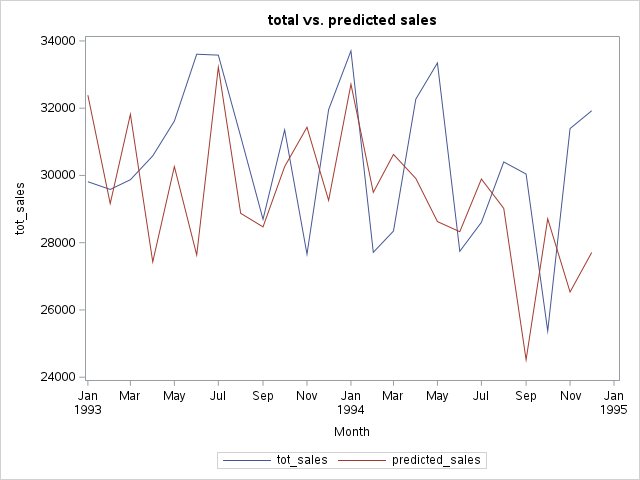

In [6]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

In [9]:
sas.sasdata('cars', libref="sashelp").head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [16]:
sas.submitLOG("""
proc sql;
    create table tmp1 as 
    select 
        origin,
        type,
        count(1) as n_cars, 
        avg(msrp) as msrp
    from sashelp.cars
    group by 1, 2
    order by 1, 2;
quit;
"""
)
df = sas.sasdata('tmp1').to_df()
df.columns = df.columns.str.lower()
df.head()

,origin,type,n_cars,msrp
0,Asia,Hybrid,3.0,19920.000000
1,Asia,SUV,25.0,29569.000000
2,Asia,Sedan,94.0,22763.968085
3,Asia,Sports,17.0,32510.647059
4,Asia,Truck,8.0,20383.625000


In [17]:
df.pivot(index='origin', columns='type', values='n_cars')

type,Hybrid,SUV,Sedan,Sports,Truck,Wagon
origin,,,,,,
Asia,3.0,25.0,94.0,17.0,8.0,11.0
Europe,NaN,10.0,78.0,23.0,NaN,12.0
USA,NaN,25.0,90.0,9.0,16.0,7.0


In [19]:
df['msrp'] = df['msrp'].astype(int)
df.pivot(index='origin', columns='type', values='msrp')

type,Hybrid,SUV,Sedan,Sports,Truck,Wagon
origin,,,,,,
Asia,19920.0,29569.0,22763.0,32510.0,20383.0,23143.0
Europe,NaN,48346.0,42992.0,71998.0,NaN,37851.0
USA,NaN,34589.0,25638.0,45257.0,27220.0,22345.0
